In [1]:
from _util import *
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

import _Experiment as _Experiment
reload(_Experiment)

# import shutil
# shutil.rmtree("res/1121/Cascading")
# shutil.rmtree("Fig/1121/Cascading")

<module '_Experiment' from '/home/ec2-user/SageMaker/NeurlPS/_Experiment.py'>

In [2]:
pm_core = 10 # memory issue, as we need to jointly solve L tasks [L, L]

In [3]:
update_freq = 500
update_freq_linear = 500

phi_beta = 1/4

with_intercept = True
seed = 1
same_reward = True
pm_core = 8

L=500 T=1000 K=5 p=300 Bandit_type=SemiBandit sigma_1=0.1 sigma_2=1 save_prefix=0.1_test_extreme Sigma_gamma_factor=1 Sigma_x_factor=1 item_update_freq=10 MTS_freq=50 GLB_freq=100 n_init=2000 alpha_GLB=1 used_agends=all LB_freq=1
batch = 0


P = 10:  14%|█▍        | 140/1000 [01:33<06:01,  2.38it/s]
(one_seed pid=30890) There were 153 divergences after tuning. Increase `target_accept` or reparameterize.
(one_seed pid=30888) There were 218 divergences after tuning. Increase `target_accept` or reparameterize.
P = 50:  24%|██▍       | 240/1000 [01:37<03:08,  4.04it/s]
(one_seed pid=30919) There were 428 divergences after tuning. Increase `target_accept` or reparameterize.
P = 50:  29%|██▉       | 290/1000 [02:18<04:06,  2.88it/s]
(one_seed pid=30907) There were 463 divergences after tuning. Increase `target_accept` or reparameterize.
Oracle TS: 100%|██████████| 1000/1000 [00:00<00:00, 3943.58it/s]


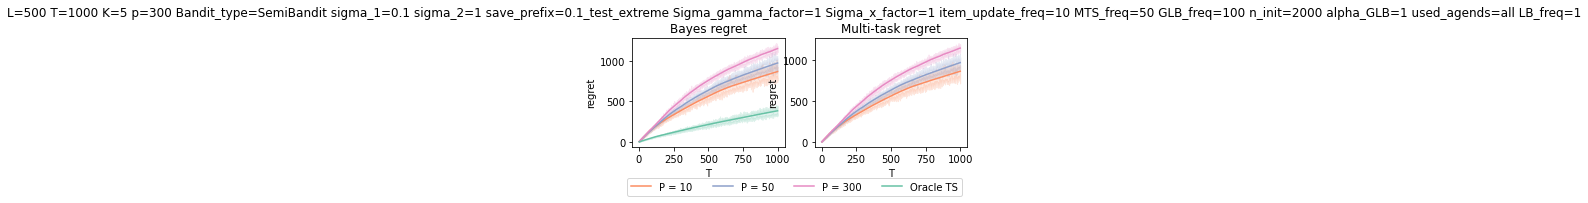

Bandit_typeSemiBandit_sigma_10.1_sigma_21_Sigma_gamma_factor1_Sigma_x_factor1_item_update_freq10_MTS_freq50_GLB_freq100_n_init2000_alpha_GLB1_used_agendsall_LB_freq1
save to res/0731/SemiBandit/_L500_T1000_K5_p300_spike_slabTrue/Bandit_typeSemiBandit_sigma_10.1_sigma_21_Sigma_gamma_factor1_Sigma_x_factor1_item_update_freq10_MTS_freq50_GLB_freq100_n_init2000_alpha_GLB1_used_agendsall_LB_freq1-0.1_test_extreme


In [4]:
L = 500
T = 1000
K = 5
p = 300
sigma_2 = 1
with_intercept = True
same_reward = True
for sigma_1 in [.1]:  # 0.25, 
    reload(_Experiment)
    run = _Experiment.run_experiment(L = L, T = T, K = K, p = p
                                     , Bandit_type = "SemiBandit"
                                     , sigma_1 = sigma_1
                                     , sigma_2 = sigma_2
                                     , with_intercept = with_intercept, same_reward = same_reward, clip = True
                                     , save_prefix = str(round(sigma_1, 2)) + '_test_extreme'
                                     #, debug_MTB = False
                                     , Sigma_gamma_factor = 1, Sigma_x_factor = 1
                                     #, misspecification = None
                                     , item_update_per100 = None, item_update_freq = 10
                                     #, only_ratio = False   
                                     , MTS_freq = 50
                                    ,sparse = True
                                     ,sparse_p_list = [10,50,300]
                                    ,spike_slab = True)
    #r = run.run_multiple_parallel_in_batch(reps = 15, batch = 3, parallel = 'parmap')
    r = run.run_multiple_parallel_in_batch(10, parallel = 'ray')
    run.plot_regret(ci = 68
                    #, plot_mean = True
                    )
    run.save(sub_folder = ["L", "T", "K", "p","spike_slab"])

In [5]:
run.names =  ["Oracle TS", "P = 10", "P = 100", "P = 300"]

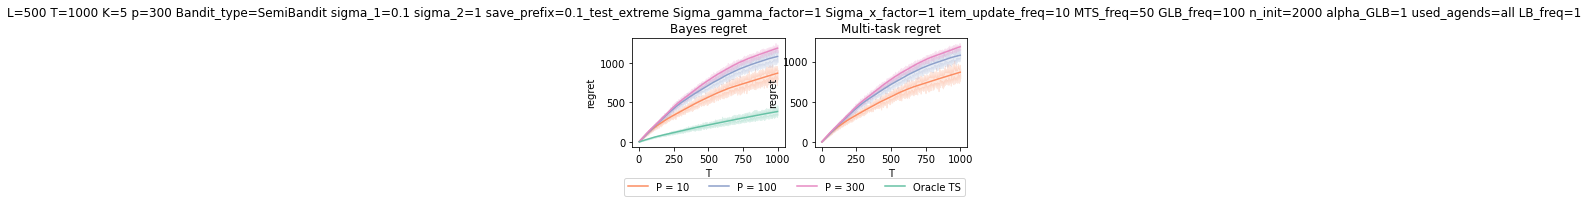

In [6]:
run.plot_regret(ci = 68
                    #, plot_mean = True
                    )

In [7]:
run.save(sub_folder = ["L", "T", "K", "p","spike_slab"])

Bandit_typeSemiBandit_sigma_10.1_sigma_21_Sigma_gamma_factor1_Sigma_x_factor1_item_update_freq10_MTS_freq50_GLB_freq100_n_init2000_alpha_GLB1_used_agendsall_LB_freq1
save to res/0731/SemiBandit/_L500_T1000_K5_p300_spike_slabTrue/Bandit_typeSemiBandit_sigma_10.1_sigma_21_Sigma_gamma_factor1_Sigma_x_factor1_item_update_freq10_MTS_freq50_GLB_freq100_n_init2000_alpha_GLB1_used_agendsall_LB_freq1-0.1_test_extreme


In [ ]:
#path = 'res/0730/SemiBandit-sparse-final/_L1000_T1000_K5_p50--sparse-final/sparse_final_Bandit_typeSemiBandit_sigma_10.5_sigma_21_Sigma_gamma_factor1_Sigma_x_factor1_item_update_freq10_MTS_freq50_GLB_freq100_n_init2000_alpha_GLB1_used_agendsall_LB_freq1-0.5_test_extreme'